# Step 1: Uploading Kaggle Credentials and Downloading Dataset


In [2]:
from google.colab import files
files.upload()

Saving kaggle (1).json to kaggle (1).json


{'kaggle (1).json': b'{"username":"renadataema","key":"04d9ba89620a479a36fa222bfa3b8146"}'}

In [3]:
import os
os.makedirs("~/.kaggle", exist_ok=True)

In [4]:
!cp kaggle.json ~/.kaggle/


cp: cannot stat 'kaggle.json': No such file or directory


In [5]:
!chmod 600 ~/.kaggle/kaggle.json


chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [6]:
!pip install kaggle

In [7]:
!kaggle datasets download -d lachmann12/world-population-demographics-by-age-2019

Dataset URL: https://www.kaggle.com/datasets/lachmann12/world-population-demographics-by-age-2019
License(s): CC0-1.0
  0% 0.00/185k [00:00<?, ?B/s]
100% 185k/185k [00:00<00:00, 59.8MB/s]


# Step 2: Extracting and Loading the Dataset

In [8]:
import zipfile

with zipfile.ZipFile('world-population-demographics-by-age-2019.zip', 'r') as zip_ref:
    zip_ref.extractall()

In [9]:
import pandas as pd

# Load the dataset (replace 'filename.csv' with the actual CSV file name)
df = pd.read_csv('world_demographics.csv')


# Step 3: Data Cleaning (Handling NaN Values and Data Types)

In [10]:
# Check the first few rows
print(df.head())

# Check the columns and data types
print(df.info())

# Get unique values for categorical columns
print(df['Country or Area'].unique())
print(df['Sex'].unique())
print(df['Age'].unique())


      Country or Area  Year   Area         Sex  Age         Record Type  \
84054   Åland Islands  2018  Total  Both Sexes    0  Estimate - de jure   
84056   Åland Islands  2018  Total  Both Sexes    1  Estimate - de jure   
84058   Åland Islands  2018  Total  Both Sexes    2  Estimate - de jure   
84059   Åland Islands  2018  Total  Both Sexes    3  Estimate - de jure   
84060   Åland Islands  2018  Total  Both Sexes    4  Estimate - de jure   

                  Reliability  Source Year  Value Value Footnotes  
84054  Final figure, complete         2019  287.5               1  
84056  Final figure, complete         2019  302.0               1  
84058  Final figure, complete         2019  320.0               1  
84059  Final figure, complete         2019  317.5               1  
84060  Final figure, complete         2019  330.0               1  
<class 'pandas.core.frame.DataFrame'>
Index: 17080 entries, 84054 to 161522
Data columns (total 10 columns):
 #   Column           Non-Null C

In [11]:
# Remove any rows with NaN values
df.dropna(inplace=True)

# Convert Age to numeric if it's not already
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Value'] = pd.to_numeric(df['Value'], errors='coerce')


# Step 4: Age Distribution Visualization (Overall)

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

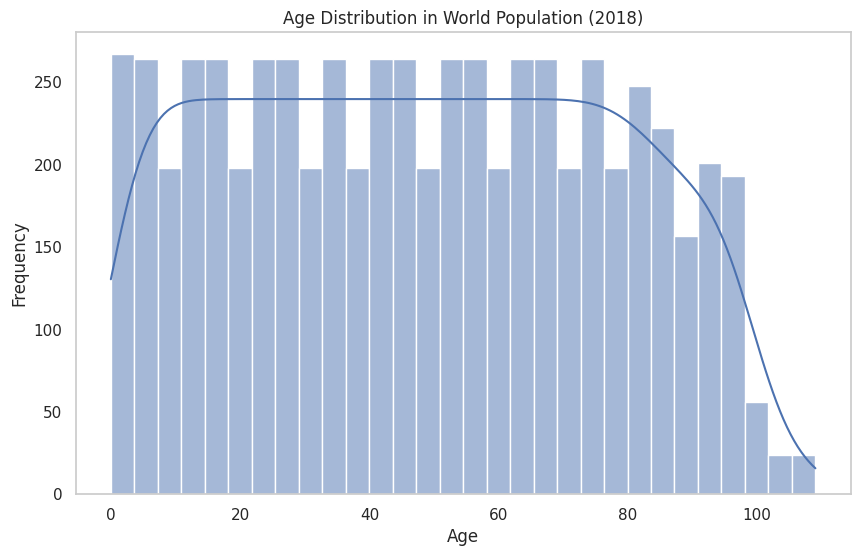

In [13]:
# Step 4: Visualize the overall age distribution across all countries

import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn plot style
sns.set(style="whitegrid")

# Create a histogram to visualize the age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True)  # Adjust bins as needed
plt.title('Age Distribution in World Population (2018)')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid()
plt.show()


# Step 5: Age Distribution Comparison Between Multiple Countries

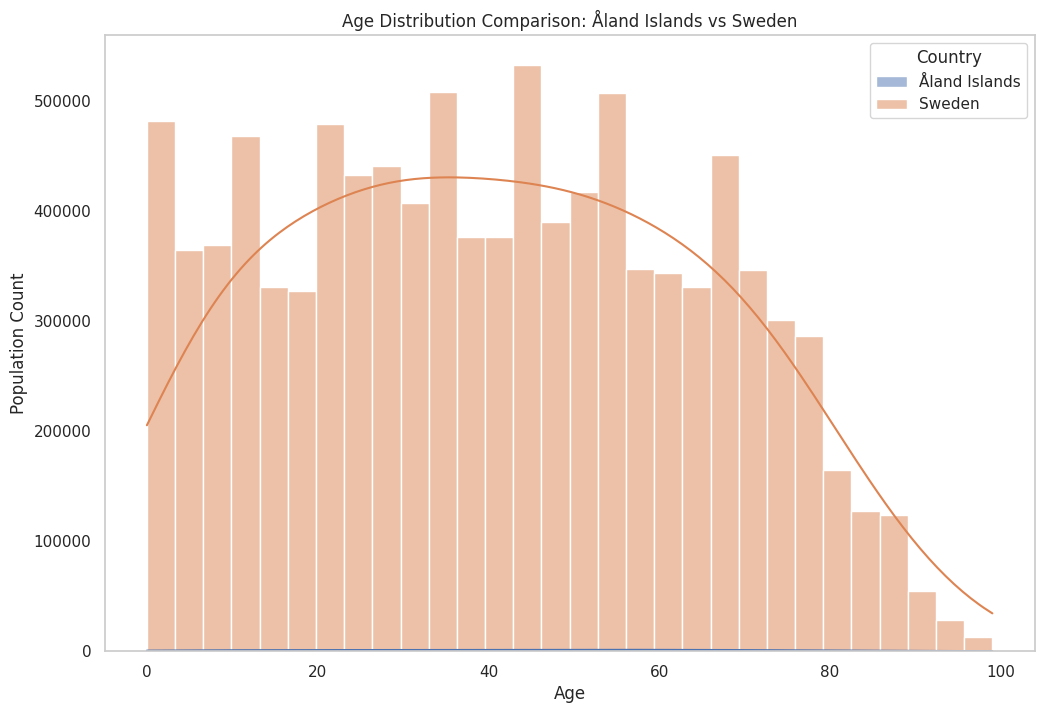

In [14]:
# Step 5: Comparing the age distribution between Åland Islands and Sweden

# Filter the data for specific countries (Åland Islands and Sweden)
countries_to_plot = ['Åland Islands', 'Sweden']
filtered_data = df[df['Country or Area'].isin(countries_to_plot)]

plt.figure(figsize=(12, 8))

# Loop through each country and plot its age distribution
for country in countries_to_plot:
    country_data = filtered_data[filtered_data['Country or Area'] == country]

    # Create histogram for each country
    sns.histplot(data=country_data, x='Age', weights='Value', bins=30, kde=True, label=country, alpha=0.5)

# Customize the plot
plt.title('Age Distribution Comparison: Åland Islands vs Sweden')
plt.xlabel('Age')
plt.ylabel('Population Count')
plt.legend(title='Country')
plt.grid()
plt.show()


# Step 6: Visualizing Gender Distribution (Bar Chart & Pie Chart)


# 1.  Bar Chart for Gender Distribution  



<ipython-input-18-ec9b198216c1>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sex', y='Value', data=gender_distribution, palette='Set2')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


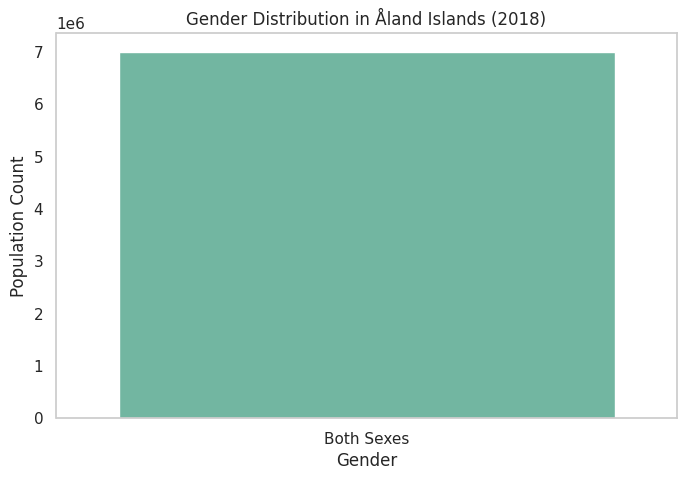

In [18]:
#  Visualize gender distribution in Åland Islands using a bar chart

# Aggregate population by gender
gender_distribution = df[df['Country or Area'] == 'Serbia'].groupby('Sex')['Value'].sum().reset_index()

# Create a bar chart for gender distribution
plt.figure(figsize=(8, 5))
sns.barplot(x='Sex', y='Value', data=gender_distribution, palette='Set2')
plt.title('Gender Distribution in Åland Islands (2018)')
plt.xlabel('Gender')
plt.ylabel('Population Count')
plt.grid(axis='y')
plt.show()



# 2.  Pie Chart for Gender Distribution



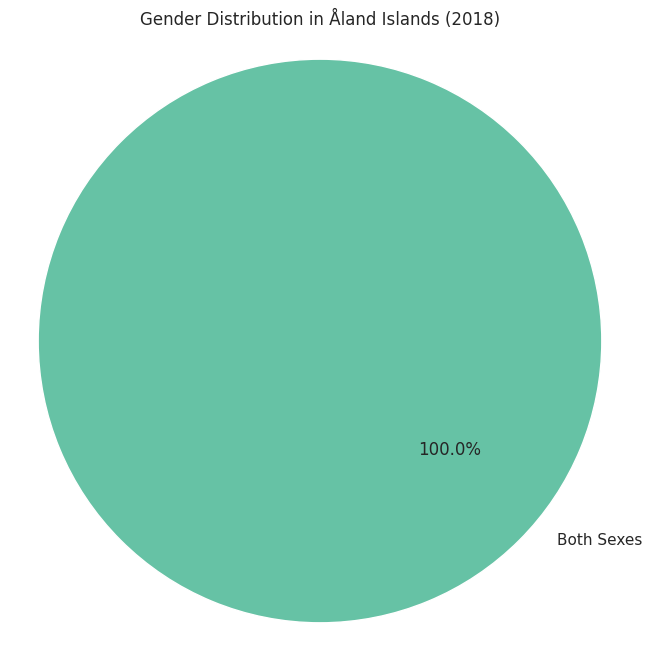

In [19]:
# Step 6.2: Visualize gender distribution in Åland Islands using a pie chart

# Prepare the data for the pie chart
gender_distribution = df[df['Country or Area'] == 'Serbia'].groupby('Sex')['Value'].sum()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', startangle=140, colors=['#66c2a5', '#fc8d62'])
plt.title('Gender Distribution in Åland Islands (2018)')
plt.axis('equal')  # Ensures the pie chart is a perfect circle
plt.show()


# Step 7: Age Group and Gender Distribution (Bar Chart)

<ipython-input-17-353f9c466524>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_gender_distribution = df[df['Country or Area'] == 'Åland Islands'].groupby(['Age Group', 'Sex'])['Value'].sum().unstack()


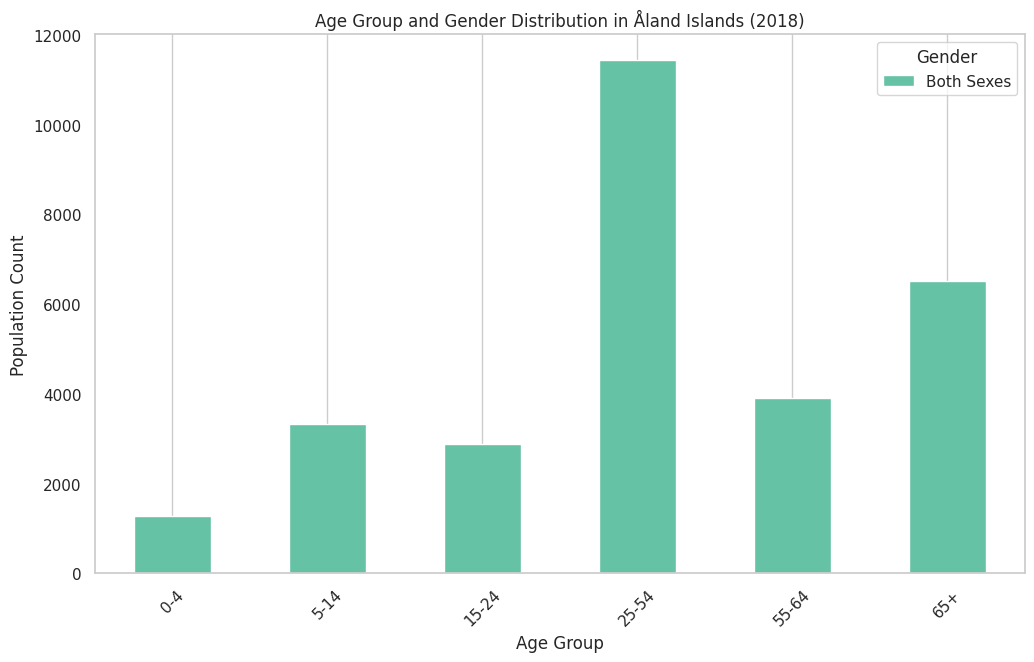

In [17]:
# Step 7: Create age groups and visualize gender distribution by age group

# Define age group bins and labels
bins = [0, 4, 14, 24, 54, 64, 100]
labels = ['0-4', '5-14', '15-24', '25-54', '55-64', '65+']

# Assign the age groups to the dataset
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels)

# Aggregate population by age group and gender
age_gender_distribution = df[df['Country or Area'] == 'Åland Islands'].groupby(['Age Group', 'Sex'])['Value'].sum().unstack()

# Create a stacked bar chart for age group and gender distribution
age_gender_distribution.plot(kind='bar', stacked=True, figsize=(12, 7), color=['#66c2a5', '#fc8d62'])
plt.title('Age Group and Gender Distribution in Åland Islands (2018)')
plt.xlabel('Age Group')
plt.ylabel('Population Count')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.grid(axis='y')
plt.show()
